In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
    

__Dataset-https://archive.ics.uci.edu/ml/datasets/Adult__

In [2]:
dataset= pd.read_csv("c:\\data\\adult_census_data.csv")

In [3]:
dataset.columns

Index(['Age', 'Workclass', 'fnlwgt', 'education', 'education_nu',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [44]:
dataset.head(5)

,Age,Workclass,fnlwgt,education,education_nu,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset.tail(2)

,Age,Workclass,fnlwgt,education,education_nu,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_nu      32561 non-null int64
marital status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
dataset['Age'] =pd.to_numeric(dataset['Age'])

In [8]:
dataset.describe(include='all')

,Age,Workclass,fnlwgt,education,education_nu,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
dataset.describe(include='O')

,Workclass,education,marital status,occupation,relationship,race,sex,native_country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
null_columns = dataset.columns[dataset.isnull().any()]

In [11]:
null_columns

Index([], dtype='object')

In [12]:
def detect_outlier_row(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    outlier_data=[]
    outlier_row=[]
    
    for i in range(len(data_1)):
        z_score= (data_1[i] - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outlier_data.append(data_1[i])
            outlier_row.append(i)
            
           
            
    return outlier_data, outlier_row

In [13]:
# iterate through each column and see if there are outliers
# you can change the columns where you want to check for outliers


for i  in range(0,len(dataset.columns)):
    outlierData=[]
    outlierRow=[]
    if dataset[dataset.columns[i]].dtypes== np.int64 or dataset[dataset.columns[i]].dtypes== np.int64  :
        outlierData, outlierRow=detect_outlier_row(dataset.iloc[:,i])
        if len(outlierRow)>0:
            print("Outlier Column Name",dataset.columns[i] + " Outlier Row numbers-",outlierRow )
            print(" Outlier data -", outlierData)

Outlier Column Name Age Outlier Row numbers- [222, 430, 918, 1040, 1168, 1935, 2303, 2754, 2891, 2906, 3211, 3537, 3777, 3963, 4070, 4109, 4834, 5104, 5272, 5291, 5370, 5406, 6214, 6232, 6439, 6624, 6748, 7481, 7720, 7872, 8381, 8431, 8694, 8806, 8963, 8973, 9471, 10124, 10210, 10545, 11238, 11512, 11731, 11996, 12451, 12492, 12830, 12975, 13025, 13295, 13696, 13928, 14104, 14159, 14604, 14711, 14756, 15356, 15662, 15892, 16302, 16762, 16901, 18037, 18272, 18277, 18413, 18560, 18725, 18832, 19045, 19172, 19180, 19212, 19489, 19495, 19515, 19689, 19747, 20249, 20421, 20463, 20482, 20610, 20826, 20953, 21501, 21812, 21835, 22220, 22481, 22895, 22898, 23459, 24027, 24043, 24238, 24280, 24395, 24560, 25303, 25397, 26012, 26731, 27795, 28463, 28721, 28948, 29594, 29724, 31030, 31432, 31696, 31814, 31836, 31855, 32277, 32367, 32459, 32494, 32525]
 Outlier data - [90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80

Outlier Column Name capital_gain Outlier Row numbers- [106, 704, 1246, 1368, 1482, 1528, 1562, 1616, 1682, 1764, 1765, 1771, 1826, 2103, 2319, 2361, 2707, 3105, 3175, 3368, 3836, 4322, 4389, 4421, 4568, 4625, 4656, 4898, 5000, 5098, 5184, 5473, 5588, 5909, 6002, 6035, 6225, 6420, 6433, 6519, 6524, 6535, 6595, 6621, 6751, 7090, 7186, 7347, 7385, 7517, 7553, 7572, 7629, 7745, 8442, 8476, 8710, 8740, 8742, 9184, 9227, 9228, 9559, 9673, 9760, 10114, 10366, 10661, 10771, 10848, 10962, 10964, 11343, 11485, 11826, 11976, 12062, 12093, 12141, 12533, 12539, 12655, 12677, 12909, 13422, 13455, 13499, 13505, 13997, 14117, 14238, 14302, 14579, 14583, 14827, 15100, 15279, 15376, 15604, 15737, 15904, 16079, 16174, 16422, 16516, 16740, 17039, 17330, 17538, 17644, 17665, 17789, 17809, 18080, 18126, 18315, 18408, 18463, 18654, 18847, 18882, 19080, 19084, 19133, 19438, 19740, 19807, 19900, 19945, 20055, 20176, 20243, 20283, 20613, 20702, 20987, 21188, 21482, 21489, 21540, 21855, 21862, 21892, 21992, 2227

Outlier Column Name hours_per_week Outlier Row numbers- [10, 28, 77, 157, 189, 272, 299, 520, 589, 935, 1034, 1036, 1064, 1066, 1172, 1200, 1262, 1272, 1411, 1417, 1458, 1500, 1684, 1730, 1824, 1887, 1929, 1987, 2015, 2333, 2358, 2429, 2444, 2594, 2761, 2920, 2932, 2959, 2963, 3092, 3225, 3291, 3302, 3343, 3578, 3749, 3773, 3909, 4086, 4091, 4101, 4236, 4294, 4308, 4312, 4337, 4348, 4441, 4568, 4736, 4778, 4862, 5085, 5172, 5242, 5376, 5432, 5468, 5489, 5507, 5590, 5594, 5632, 5682, 5766, 5808, 5877, 5916, 6070, 6084, 6180, 6380, 6390, 6475, 6524, 6618, 6693, 6743, 6744, 6822, 6846, 6898, 7027, 7100, 7142, 7527, 7580, 7606, 7678, 7809, 7810, 7863, 8038, 8045, 8069, 8072, 8149, 8160, 8224, 8375, 8393, 8410, 8431, 8447, 8551, 8584, 8628, 8634, 8654, 8669, 8704, 8711, 8745, 8780, 8796, 8823, 9058, 9124, 9147, 9322, 9398, 9582, 9718, 9741, 9811, 9831, 9884, 10060, 10126, 10137, 10143, 10260, 10266, 10377, 10468, 10728, 10841, 10850, 10914, 10954, 10957, 10986, 11059, 11135, 11157, 11451, 1

In [14]:
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
           
            
    return outliers

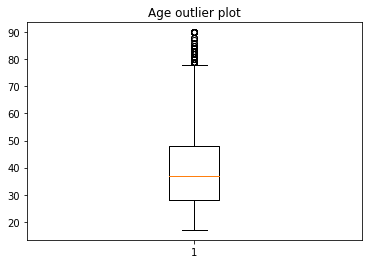

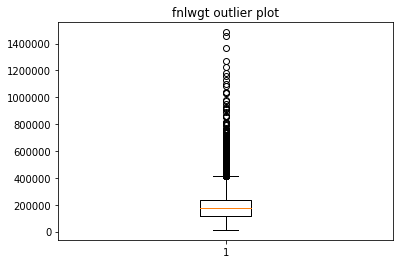

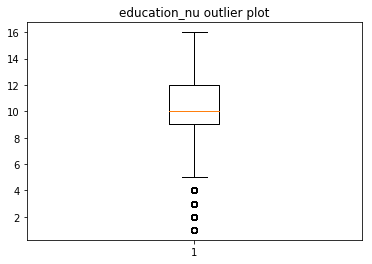

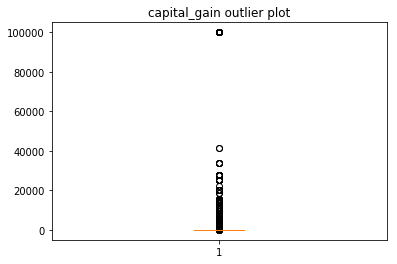

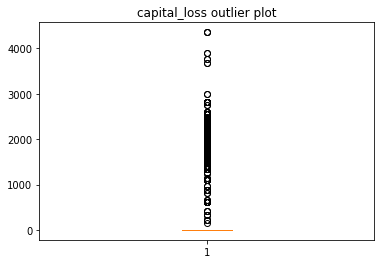

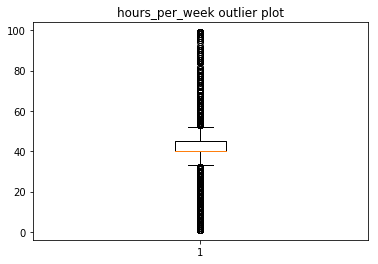

In [15]:
# iterate through each column and see if there are outliers
# you can change the columns where you want to check for outliers
# plots the outliers
fig=plt.figure()

for i  in range(0,len(dataset.columns)):
    outliers=[]
   
    if dataset[dataset.columns[i]].dtypes== np.int64 or dataset[dataset.columns[i]].dtypes== np.int64  :
        
        outliers=detect_outlier(dataset.iloc[:,i])
        if len(outliers)>0:
                   
            ax = plt.subplot(1,1,1)
            #Variable
            ax.boxplot(dataset[list(dataset.columns)[i]])
            plt.title(list(dataset.columns)[i] + " outlier plot")
            plt.show()

In [16]:
#1 = not correlated.
#Between 1 and 5 = moderately correlated.
#Greater than 5 = highly correlated.

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]


In [17]:
dataset.columns


Index(['Age', 'Workclass', 'fnlwgt', 'education', 'education_nu',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [18]:
dataset_clean=dataset[['Age','fnlwgt','education_nu', 'capital_gain', 'capital_loss', 'hours_per_week']]
clean_data = calculate_vif_(dataset_clean)

dropping 'education_nu' at index: 2
dropping 'hours_per_week' at index: 4
Remaining variables:
Index(['Age', 'fnlwgt', 'capital_gain', 'capital_loss'], dtype='object')


In [19]:
# Applying the MinMax Scaler
#Transforms features by scaling each feature to a given range
# Applying the MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
sc_minmax= MinMaxScaler()
dataset_sc_minmax= dataset[['Age','fnlwgt','education_nu', 'capital_gain', 'capital_loss', 'hours_per_week']]
dataset_sc_minmax= pd.DataFrame(sc_minmax.fit_transform(dataset_sc_minmax))
dataset_sc_minmax.columns=['Age','fnlwgt','education_nu', 'capital_gain', 'capital_loss', 'hours_per_week']

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
dataset_sc_minmax.head(2)

,Age,fnlwgt,education_nu,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.8,0.02174,0.0,0.397959
1,0.452055,0.048238,0.8,0.00000,0.0,0.122449


In [102]:
from sklearn.preprocessing import  LabelEncoder

dataset_input= dataset[['Workclass','education','marital status', 'occupation', 'relationship', 'race','sex']].values
dataset_target = dataset[['salary']].values

labelencoder_X=LabelEncoder()
dataset_input[:,0] = labelencoder_X.fit_transform(dataset_input[:,0])
dataset_input[:,1] = labelencoder_X.fit_transform(dataset_input[:,1])
dataset_input[:,2] = labelencoder_X.fit_transform(dataset_input[:,2])
dataset_input[:,3] = labelencoder_X.fit_transform(dataset_input[:,3])
dataset_input[:,4] = labelencoder_X.fit_transform(dataset_input[:,4])
dataset_input[:,5] = labelencoder_X.fit_transform(dataset_input[:,5])
dataset_input[:,6] = labelencoder_X.fit_transform(dataset_input[:,6])
# Applying Lable encoder to Binary Target variable
dataset_target[:,0]=labelencoder_X.fit_transform(dataset_target[:,0])

In [104]:
dataset_input = pd.DataFrame(dataset_input)
dataset_input.columns=['Workclass','education','marital status', 'occupation', 'relationship', 'race','sex']
dataset_input.head(5)

,Workclass,education,marital status,occupation,relationship,race,sex
0,7,9,4,1,1,4,1
1,6,9,2,4,0,4,1
2,4,11,0,6,1,4,1
3,4,1,2,6,0,2,1
4,4,9,2,10,5,2,0


In [107]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder= OneHotEncoder(categories='auto')
dataset_input=oneHotEncoder.fit_transform(dataset_input).toarray()
dataset_input = pd.DataFrame(dataset_input)
dataset_input.head(5)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [111]:
dataset_target = pd.DataFrame(dataset_target)
dataset_target.columns=['Salary Range']
dataset_target.head(2)

,Salary Range
0,0
1,0


In [28]:
dataset_input=pd.DataFrame(dataset_input)
final_df= pd.concat([dataset_input, dataset_sc_minmax], axis=1)

In [119]:
final_df= pd.DataFrame(final_df)
final_df.columns=['Workclass_1','Workclass_2','Workclass_3','Workclass_4','Workclass_5','Workclass_6','Workclass_7','Workclass_81','Workclass_9',
       'education_1','education_2','education_3','education_4','education_5','education_6','education_7','education_8','education_9','education_10','education_11','education_12','education_13','education_14','education_15','education_16',
       'marital status_1', 'marital status_2', 'marital status_3', 'marital status_4', 'marital status_5', 'marital status_6', 'marital status_7', 
       'occupation_1','occupation_2', 'occupation_3','occupation_4','occupation_5','occupation_6','occupation_7','occupation_8','occupation_9','occupation_10','occupation_11','occupation_12','occupation_13','occupation_14','occupation_15',
       'relationship_1', 'relationship_2','relationship_3','relationship_4','relationship_5','relationship_6',
       'race_1','race_2','race_3','race_4','race_5',
       'sex_male','sex_female',
       'Age','fnlwgt','education_nu', 'capital_gain', 'capital_loss', 'hours_per_week']
final_df.head(2)

,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_81,Workclass_9,education_1,...,race_4,race_5,sex_male,sex_female,Age,fnlwgt,education_nu,capital_gain,capital_loss,hours_per_week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.301370,0.044302,0.8,0.02174,0.0,0.397959
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.452055,0.048238,0.8,0.00000,0.0,0.122449


In [30]:
dataset.corr()

,Age,fnlwgt,education_nu,capital_gain,capital_loss,hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_nu,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Text(0.5, 1.0, ' Pearson Correlation ')

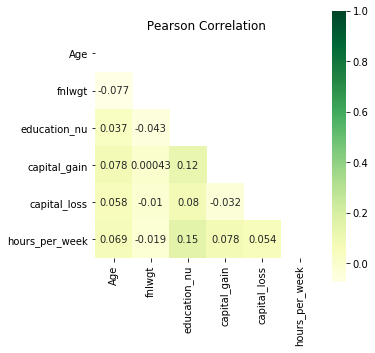

In [123]:
corr=dataset_sc_minmax.corr(method='pearson')
fig, ax = plt.subplots(figsize=(5,5))
cmap= sns.diverging_palette(220,10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap="YlGn", square=True, annot=True, ax=ax, mask=mask)
plt.title(" Pearson Correlation ")

In [124]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=-1)

# Train the classifier
regressor.fit(final_df, dataset_target.values)

# Print the name and gini importance of each feature
for feature in  regressor.feature_importances_:
    print(feature  )

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.0014220077398738246
0.005295101180712486
0.006451917288026765
2.2769986210115843e-07
0.009761772412550699
0.006026243380712795
0.009046196008844399
0.004743088785621419
2.8683150624347487e-05
0.000491408543867887
0.0007185929041946848
0.0004445112848063467
0.00012578383755425677
0.00027696606720565436
0.00040928177131983607
0.0004819396532905818
0.00165054506712533
0.0026353422820366485
0.0024030105898276994
0.0006340097855275966
0.0030742795560849056
0.0020320601612670167
6.275102433613358e-05
0.0010413416746105724
0.003354482585707081
0.00210964749118445
0.00043582286048234693
0.1977259015832358
0.000759522062919115
0.0020693460989796323
0.0010192428433343872
0.0011604625357815148
0.001401496264361809
0.005887663228073563
1.239949028367046e-06
0.00850834303030196
0.011088731391095894
0.0035838938496025054
0.003279456182616122
0.005346110236245573
0.004681159434017995
3.2766932600032265e-05
0.00810403418224147
0.0035372935039296814
0.008232490198713121
0.005388525392625141
0.0058606

In [ ]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

Features sorted by their score:
[(0.1977, 'marital status_3'), (0.1814, 'sex_female'), (0.1158, 'sex_male'), (0.1134, 'Age'), (0.1057, 'fnlwgt'), (0.0661, 'capital_gain'), (0.0379, 'education_nu'), (0.0111, 'occupation_3'), (0.0098, 'Workclass_5'), (0.009, 'Workclass_7'), (0.0085, 'occupation_2'), (0.0082, 'occupation_11'), (0.0081, 'occupation_9'), (0.0065, 'Workclass_3'), (0.006, 'Workclass_6'), (0.0059, 'occupation_13'), (0.0059, 'marital status_9'), (0.0058, 'race_3'), (0.0054, 'occupation_12'), (0.0053, 'occupation_6'), (0.0053, 'Workclass_2'), (0.0047, 'occupation_7'), (0.0047, 'Workclass_81'), (0.0046, 'relationship_4'), (0.0043, 'race_1'), (0.0039, 'race_5'), (0.0039, 'race_4'), (0.0036, 'relationship_6'), (0.0036, 'occupation_4'), (0.0035, 'occupation_10'), (0.0034, 'education_16'), (0.0033, 'occupation_5'), (0.0031, 'education_12'), (0.0026, 'education_9'), (0.0025, 'occupation_14'), (0.0024, 'occupation_15'), (0.0024, 'education_10'), (0.0021, 'marital status_5'), (0.0021, '

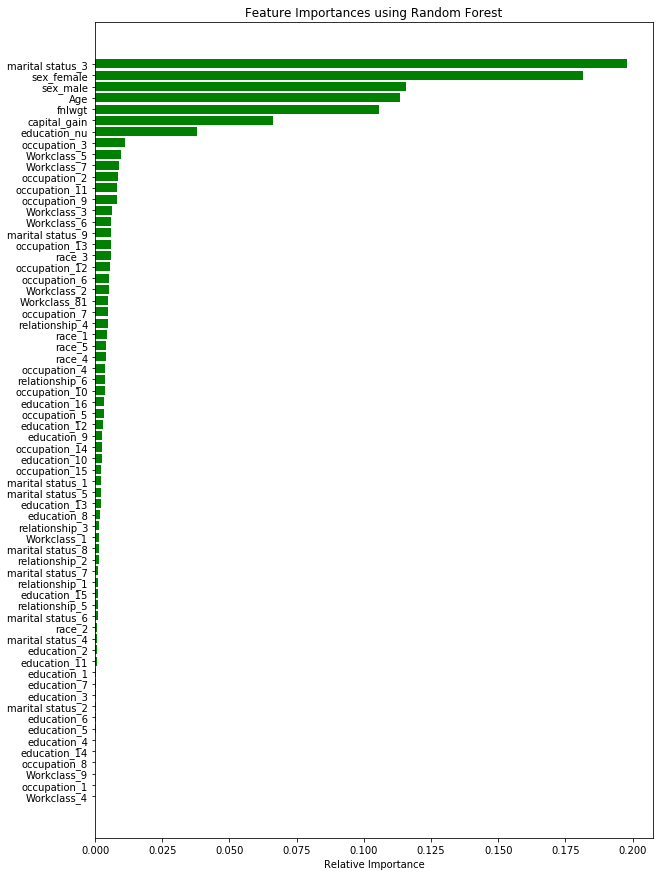

In [125]:
names=['Workclass_1','Workclass_2','Workclass_3','Workclass_4','Workclass_5','Workclass_6','Workclass_7','Workclass_81','Workclass_9',
       'education_1','education_2','education_3','education_4','education_5','education_6','education_7','education_8','education_9','education_10','education_11','education_12','education_13','education_14','education_15','education_16',
       'marital status_1', 'marital status_2', 'marital status_3', 'marital status_4', 'marital status_5', 'marital status_6', 'marital status_7', 'marital status_8', 'marital status_9', 
       'occupation_1','occupation_2', 'occupation_3','occupation_4','occupation_5','occupation_6','occupation_7','occupation_8','occupation_9','occupation_10','occupation_11','occupation_12','occupation_13','occupation_14','occupation_15',
       'relationship_1', 'relationship_2','relationship_3','relationship_4','relationship_5','relationship_6',
       'race_1','race_2','race_3','race_4','race_5',
       'sex_male','sex_female',
       'Age','fnlwgt','education_nu', 'capital_gain', 'capital_loss', 'hours_per_week']
print( "Features sorted by their score:")
print( sorted(zip(map(lambda x: round(x, 4), regressor.feature_importances_), names), 
             reverse=True))
importances = regressor.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,15))
plt.title('Feature Importances using Random Forest')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [96]:
le= LabelEncoder()
le.fit(["African", "American", "Asian"])
le.classes_

array(['African', 'American', 'Asian'], dtype='<U8')

In [97]:
X=le.transform(["American", "Asian", "African"]) 

In [98]:
le.inverse_transform([1, 2, 0])

array(['American', 'Asian', 'African'], dtype='<U8')

In [99]:
oe= OneHotEncoder(categories='auto')

X= np.array(X)
X= X.reshape(-1,1)
X= oe.fit_transform(X)
X.toarray()


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [142]:
y=np.array(dataset_target)
y=y.astype('int')
y= y.ravel()
y

array([0, 0, 0, ..., 0, 0, 1])